### Create Choropleths based on 'company_location'

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import geopandas as gpd
import pycountry

In [2]:
data = pd.read_csv('data/salaries.csv')

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,MI,FT,DevOps Engineer,55000,EUR,65013,FR,100,FR,S
1,2021e,SE,FT,DevOps Architect,165000,USD,165000,US,100,US,L
2,2021e,EN,FT,DevOps Engineer,100000,USD,100000,US,100,US,L
3,2021e,SE,FT,Staff Site Reliability Engineer,225000,USD,225000,US,50,US,L
4,2021e,SE,FT,DevOps Engineer,142000,CAD,113262,CA,100,CA,M


In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [5]:
print(world.shape)
world.head()

(177, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [6]:
def alpha3code(column):
    codes_a3 = []
    for code_a2 in column:
        try:
            code_a3 = pycountry.countries.get(alpha_2=code_a2).alpha_3
            codes_a3.append(code_a3)
        except:
            codes_a3.append('None')
    return codes_a3

In [7]:
data['iso_a3']=alpha3code(data.company_location)

In [8]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,iso_a3
0,2021e,MI,FT,DevOps Engineer,55000,EUR,65013,FR,100,FR,S,FRA
1,2021e,SE,FT,DevOps Architect,165000,USD,165000,US,100,US,L,USA
2,2021e,EN,FT,DevOps Engineer,100000,USD,100000,US,100,US,L,USA
3,2021e,SE,FT,Staff Site Reliability Engineer,225000,USD,225000,US,50,US,L,USA
4,2021e,SE,FT,DevOps Engineer,142000,CAD,113262,CA,100,CA,M,CAN


In [9]:
data_2020 = data.loc[data['work_year'] == '2020']
data_2021 = data.loc[data['work_year'] == '2021']
data_remote_0 = data.loc[data['remote_ratio'] == 0]
data_remote_50 = data.loc[data['remote_ratio'] == 50]
data_remote_100 = data.loc[data['remote_ratio'] == 100]

In [10]:
print(data.shape)
print(data_2020.shape)
print(data_2021.shape)
print(data_remote_0.shape)
print(data_remote_50.shape)
print(data_remote_100.shape)

(2451, 12)
(457, 12)
(1063, 12)
(18, 12)
(725, 12)
(1708, 12)


In [11]:
means_2020 = data_2020.groupby(data_2020['iso_a3'])['salary_in_usd'].mean()
means_2021 = data_2021.groupby(data_2021['iso_a3'])['salary_in_usd'].mean()
means_full = data.groupby(data['iso_a3'])['salary_in_usd'].mean()
means_remote_0 = data_remote_0.groupby(data['iso_a3'])['salary_in_usd'].mean()
means_remote_50 = data_remote_50.groupby(data['iso_a3'])['salary_in_usd'].mean()
means_remote_100 = data_remote_100.groupby(data['iso_a3'])['salary_in_usd'].mean()

In [12]:
print(means_2020.shape)
means_2020.head()

(44,)


iso_a3
ARG     31000.000000
AUS     89852.500000
AUT     65766.666667
BEL     76601.666667
CAN    104644.500000
Name: salary_in_usd, dtype: float64

In [13]:
print(means_2021.shape)
means_2021.head()

(65,)


iso_a3
AFG      2000.000000
ARG     90000.000000
ARM     36000.000000
ASM     18053.000000
AUS    119894.263158
Name: salary_in_usd, dtype: float64

In [14]:
print(means_full.shape)
means_full.head()

(72,)


iso_a3
AFG      2000.000000
ARG     60500.000000
ARM     36000.000000
ASM     18053.000000
AUS    115896.232558
Name: salary_in_usd, dtype: float64

In [15]:
print(means_remote_0.shape)
means_remote_0.head()

(13,)


iso_a3
BRN      6600.0
FRA     51183.0
IND     12171.0
ITA     28511.0
KWT    120000.0
Name: salary_in_usd, dtype: float64

In [16]:
print(means_remote_50.shape)
means_remote_50.head()

(50,)


iso_a3
ARG     69000.000000
ARM     36000.000000
AUS    121676.941176
AUT     69752.000000
BEL     66112.555556
Name: salary_in_usd, dtype: float64

In [17]:
print(means_remote_100.shape)
means_remote_100.head()

(56,)


iso_a3
AFG      2000.000000
ARG     35000.000000
ASM     18053.000000
AUS    112116.538462
AUT     63317.272727
Name: salary_in_usd, dtype: float64

In [18]:
merge_2020=pd.merge(world, means_2020, on='iso_a3', how="outer")
merge_2021=pd.merge(world, means_2021, on='iso_a3', how="outer")
merge_full=pd.merge(world, means_full, on='iso_a3', how="outer")
merge_remote_0=pd.merge(world, means_remote_0, on='iso_a3', how="outer")
merge_remote_50=pd.merge(world, means_remote_50, on='iso_a3', how="outer")
merge_remote_100=pd.merge(world, means_remote_100, on='iso_a3', how="outer")

In [19]:
print(merge_2020.shape)
merge_2020.head()

(180, 7)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,salary_in_usd
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",104644.500000
4,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",134872.458955


In [20]:
print(merge_2021.shape)
merge_2021.head()

(183, 7)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,salary_in_usd
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",99692.388060
4,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",134522.897112


In [21]:
print(merge_full.shape)
merge_2021.head()

(183, 7)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,salary_in_usd
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",99692.388060
4,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",134522.897112


In [22]:
print(merge_remote_0.shape)
merge_remote_0.head()

(179, 7)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,salary_in_usd
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN
4,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",123000.0


In [23]:
print(merge_remote_50.shape)
merge_remote_50.head()

(182, 7)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,salary_in_usd
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",114028.424242
4,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",131512.322807


In [24]:
print(merge_remote_100.shape)
merge_remote_100.head()

(181, 7)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,salary_in_usd
0,920938.0,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN
1,53950935.0,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN
2,603253.0,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN
3,35623680.0,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",97454.541667
4,326625791.0,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",137075.037864


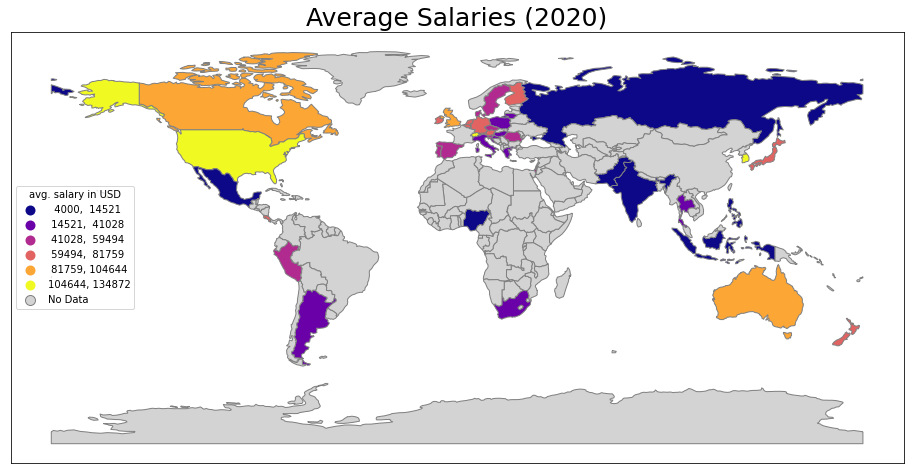

In [25]:
fig, ax = plt.subplots(1, figsize=(16, 9))
merge_2020.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}"},
           scheme='natural_breaks', k=6, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

ax.set_title('Average Salaries (2020)',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD')
ax.get_legend().texts[6].set_text('No Data')

plt.show()

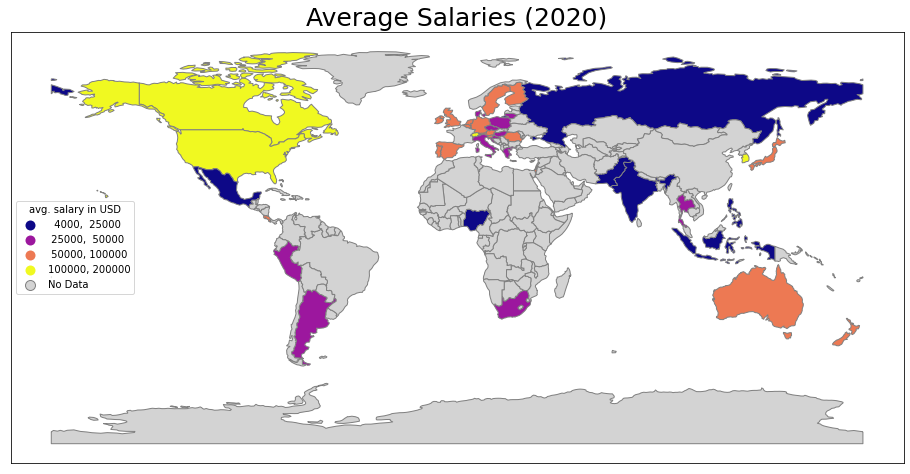

In [26]:
fig, ax = plt.subplots(1, figsize=(16, 9))

merge_2020.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}"},
                scheme='user_defined', classification_kwds={'bins':[25000, 50000, 100000, 200000]}, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

ax.set_title('Average Salaries (2020)',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD')
ax.get_legend().texts[4].set_text('No Data')

plt.show()

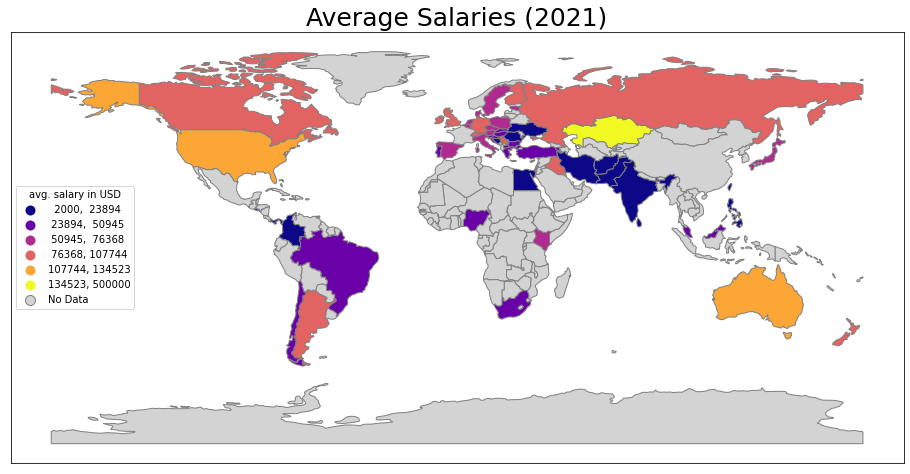

In [27]:
fig, ax = plt.subplots(1, figsize=(16, 9))
merge_2021.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}"},
           scheme='natural_breaks', k=6, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

ax.set_title('Average Salaries (2021)',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD')
ax.get_legend().texts[6].set_text('No Data')

plt.show()

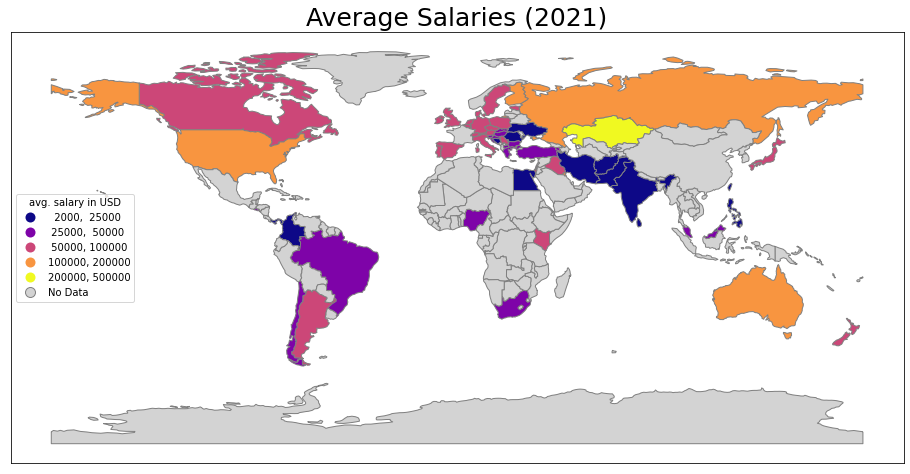

In [28]:
fig, ax = plt.subplots(1, figsize=(16, 9))

merge_2021.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}"},
                scheme='user_defined', classification_kwds={'bins':[25000, 50000, 100000, 200000]}, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

ax.set_title('Average Salaries (2021)',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD')
ax.get_legend().texts[5].set_text('No Data')

plt.show()

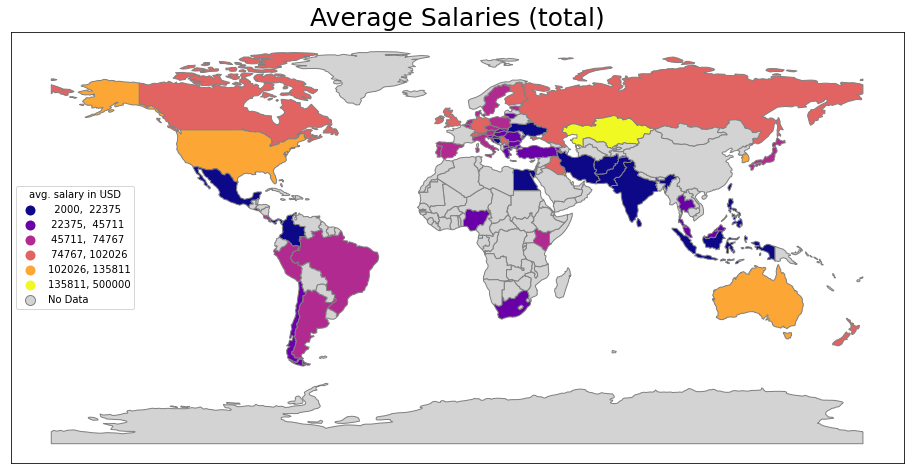

In [29]:
fig, ax = plt.subplots(1, figsize=(16, 9))
merge_full.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}"},
           scheme='natural_breaks', k=6, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

ax.set_title('Average Salaries (total)',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD')
ax.get_legend().texts[6].set_text('No Data')

plt.show()

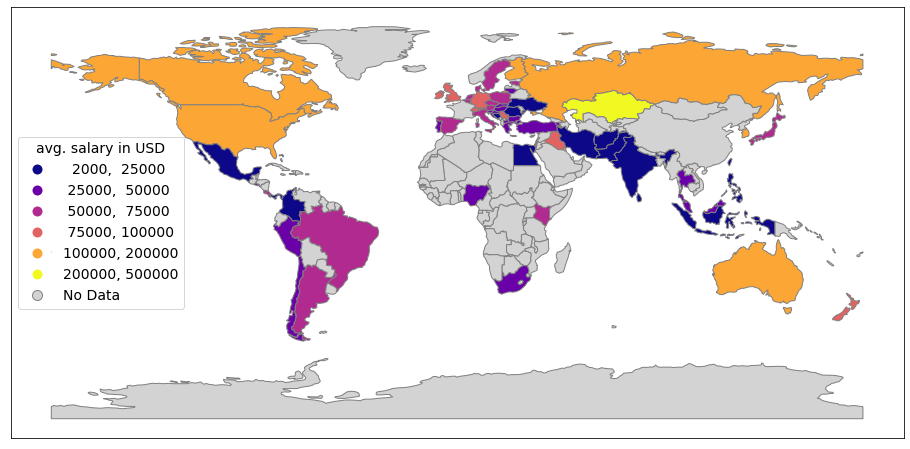

In [30]:
fig, ax = plt.subplots(1, figsize=(16, 9))

merge_full.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}", 'fontsize':'14'},
                scheme='user_defined', classification_kwds={'bins':[25000, 50000, 75000, 100000, 200000]}, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

#ax.set_title('Average Salaries (total)',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD', prop={'size':'14'})
ax.get_legend().texts[6].set_text('No Data')

plt.savefig('salaries_company_loc.pdf')

plt.show()

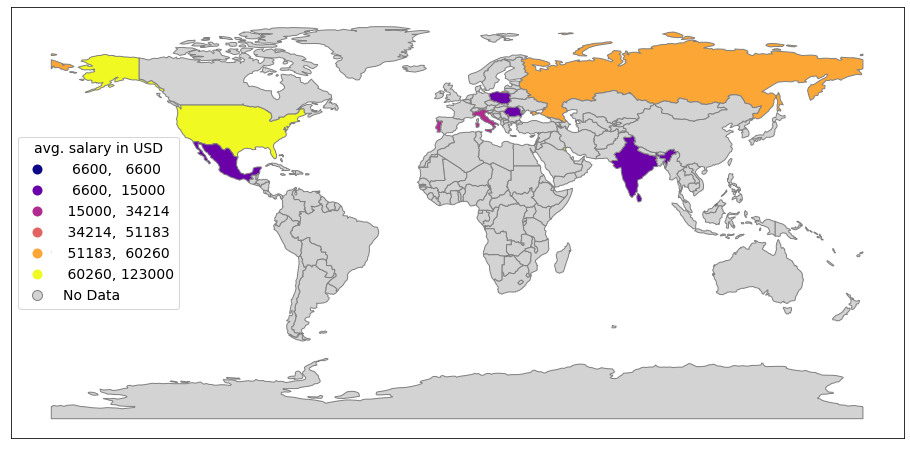

In [31]:
fig, ax = plt.subplots(1, figsize=(16, 9))
merge_remote_0.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}", 'fontsize':'14'},
           scheme='natural_breaks', k=6, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

#ax.set_title('No Remote Work Salaries',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD', prop={'size':'14'})
ax.get_legend().texts[6].set_text('No Data')

plt.show()

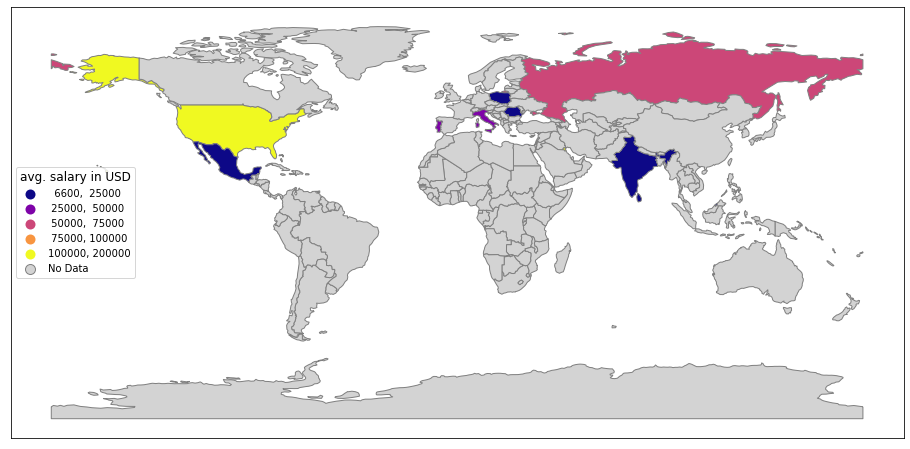

In [32]:
fig, ax = plt.subplots(1, figsize=(16, 9))

merge_remote_0.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}"},
                scheme='user_defined', classification_kwds={'bins':[25000, 50000, 75000, 100000, 200000]}, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

#ax.set_title('No Remote Work Salaries',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD', prop={'size':'large'})
ax.get_legend().texts[5].set_text('No Data')

plt.savefig('no_remote_work_company_loc.pdf')

plt.show()

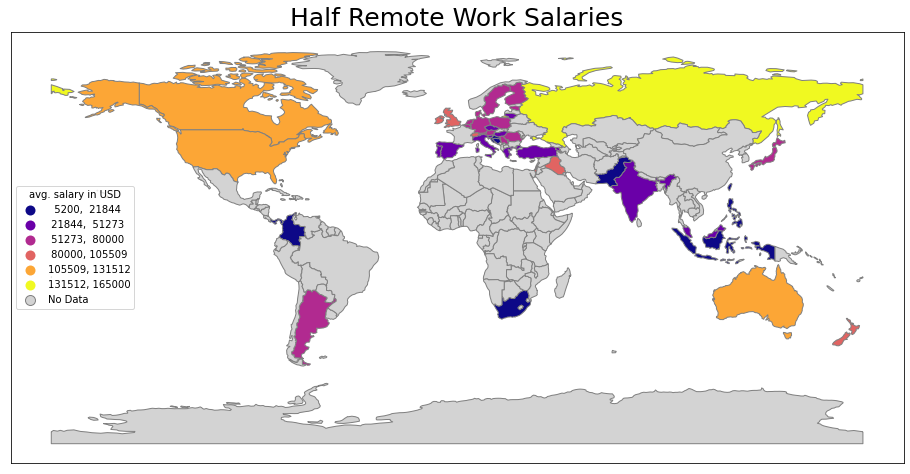

In [33]:
fig, ax = plt.subplots(1, figsize=(16, 9))
merge_remote_50.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}"},
           scheme='natural_breaks', k=6, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

ax.set_title('Half Remote Work Salaries',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD')
ax.get_legend().texts[6].set_text('No Data')

plt.show()

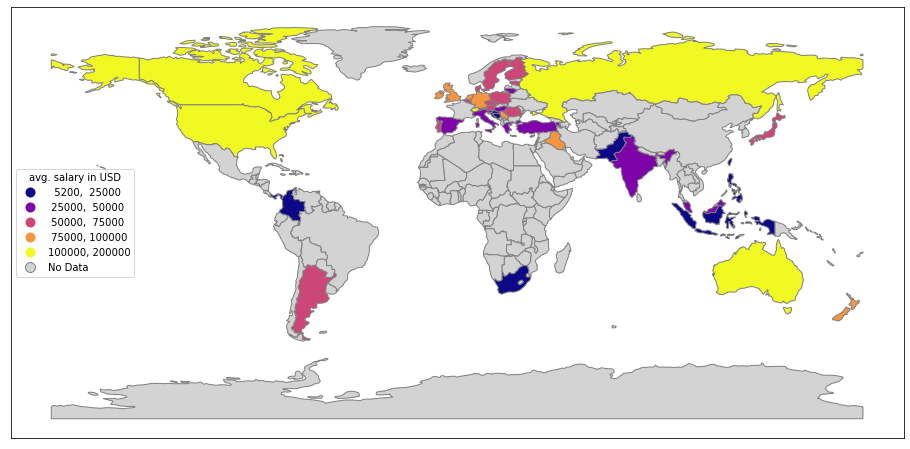

In [34]:
fig, ax = plt.subplots(1, figsize=(16, 9))

merge_remote_50.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}"},
                scheme='user_defined', classification_kwds={'bins':[25000, 50000, 75000, 100000, 200000]}, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

#ax.set_title('Half Remote Work Salaries',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD')
ax.get_legend().texts[5].set_text('No Data')

plt.savefig('half_remote_work_company_loc.pdf')

plt.show()

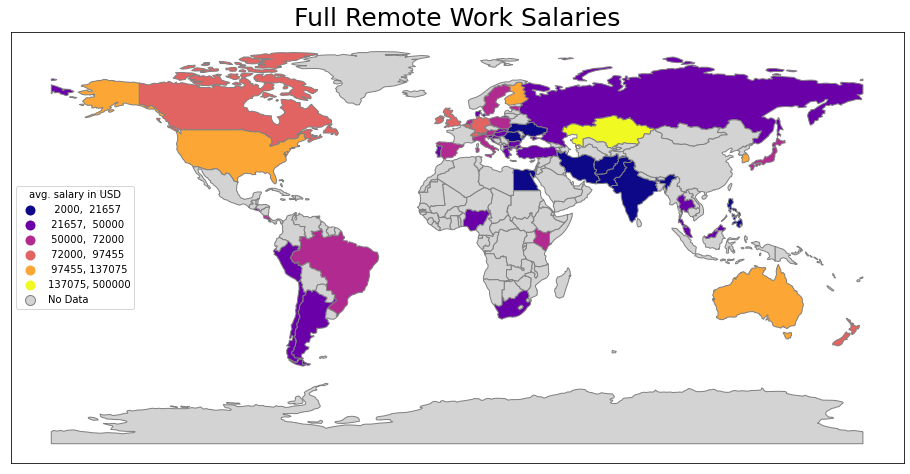

In [35]:
fig, ax = plt.subplots(1, figsize=(16, 9))
merge_remote_100.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}"},
           scheme='natural_breaks', k=6, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

ax.set_title('Full Remote Work Salaries',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD')
ax.get_legend().texts[6].set_text('No Data')

plt.show()

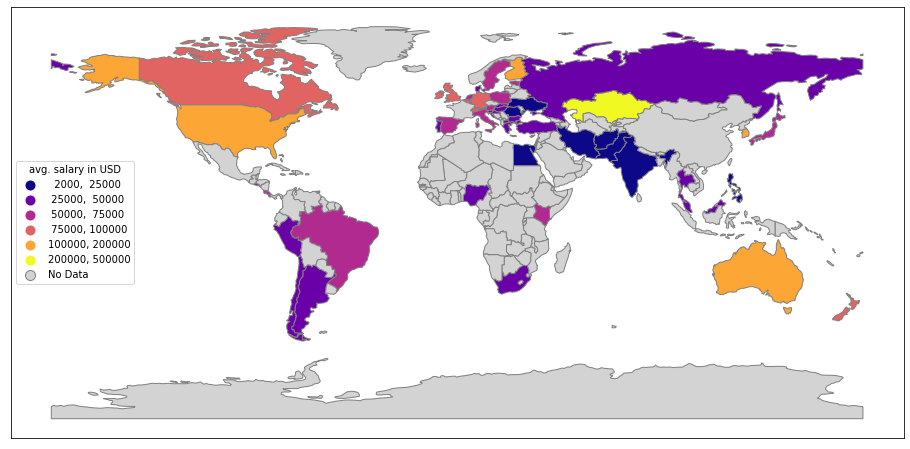

In [36]:
fig, ax = plt.subplots(1, figsize=(16, 9))

merge_remote_100.plot(column='salary_in_usd', ax=ax, edgecolor="gray", legend=True, legend_kwds={'loc': 'center left', 'fmt':"{:.0f}"},
                scheme='user_defined', classification_kwds={'bins':[25000, 50000, 75000, 100000, 200000]}, missing_kwds={'color': 'lightgrey'}, cmap='plasma')

#ax.set_title('Full Remote Work Salaries',fontsize=25)

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

ax.get_legend().set_title('avg. salary in USD')
ax.get_legend().texts[6].set_text('No Data')

plt.savefig('full_remote_work_company_loc.pdf')

plt.show()
